In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
display(HTML("<style>.container { font-size:18px !important; }</style>"))

import matplotlib.pyplot as plt 
import numpy as np 
from scipy.signal import unit_impulse
from numpy.fft import rfft

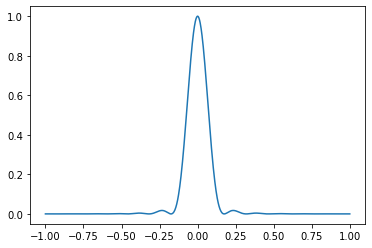

In [5]:
import scipy.special as special
theta = np.linspace(-1,1,1000)
theta *= np.pi / 180.
llambda = 500E-9
k = 2.* np.pi/llambda
a = 0.1E-3

pattern = 2 * special.jv(1,k*a*np.sin(theta)) / (k*a*np.sin(theta))

pattern = np.abs(pattern)**2.0
theta *= 180./np.pi
plt.figure()
plt.plot(theta,pattern)

Now in 2D!

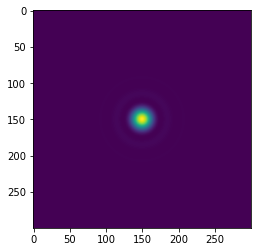

In [6]:
N = 300
theta = np.linspace(-1,1,N)
theta *= np.pi / 180.
llambda = 500E-9
a = 0.1E-3
pattern = np.zeros([N,N])
for i in range(0,N):
    for j in range(0,N):
        thetap = np.sqrt(theta[i]**2.0 + theta[j]**2.0)
        pattern[i,j] = 2 * special.jv(1,k*a*np.sin(thetap)) / (k*a*np.sin(thetap))
pattern = np.abs(pattern)**2.0        
theta *= 180./np.pi
plt.figure()
plt.imshow(pattern)
#plt.imshow(np.log10(pattern),vmin=-5,vmax=0)

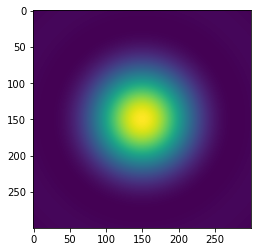

In [7]:
N = 300
theta = np.linspace(-1,1,N)
theta *= np.pi / 180.
llambda = 500E-9
a = 0.02E-3
pattern = np.zeros([N,N])
for i in range(0,N):
    for j in range(0,N):
        thetap = np.sqrt(theta[i]**2.0 + theta[j]**2.0)
        pattern[i,j] = 2 * special.jv(1,k*a*np.sin(thetap)) / (k*a*np.sin(thetap))
pattern = np.abs(pattern)**2.0        
theta *= 180./np.pi
plt.figure()
plt.imshow(pattern.T)

Keep in mind that this does not show scaling. That is, both the images are normalized to the maximum.
Let's do the first one in the log scale to see the secondary maxima:

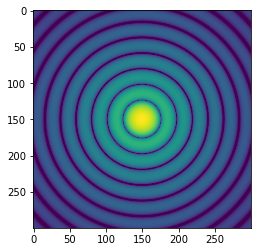

In [8]:
N = 300
theta = np.linspace(-1,1,N)
theta *= np.pi / 180.
llambda = 500E-9
a = 0.1E-3
pattern = np.zeros([N,N])
for i in range(0,N):
    for j in range(0,N):
        thetap = np.sqrt(theta[i]**2.0 + theta[j]**2.0)
        pattern[i,j] = 2 * special.jv(1,k*a*np.sin(thetap)) / (k*a*np.sin(thetap))
pattern = np.abs(pattern)**2.0        
theta *= 180./np.pi
plt.figure()
plt.imshow(np.log10(pattern).T,vmin=-5,vmax=0)

Now finally, let's see how the diffraction acts on an image, for starters a delta function! 

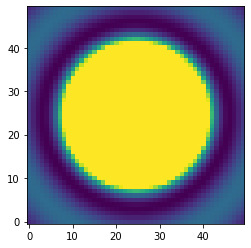

In [21]:
N = 50
theta = np.linspace(-0.1,0.1,N)
theta *= np.pi / 180.
llambda = 500E-9
a = 0.2E-3
pattern = np.zeros([N,N])
thetap = np.sqrt(theta[:,None]**2.0 + theta[None,:]**2.0)
pattern = 2 * special.jv(1,k*a*np.sin(thetap)) / (k*a*np.sin(thetap))
pattern = np.abs(pattern)**2.0        
theta *= 180./np.pi
plt.figure()
plt.imshow(pattern,vmax=5E-2,origin='lower')

Text(0.5, 1.0, 'With Diffraction')

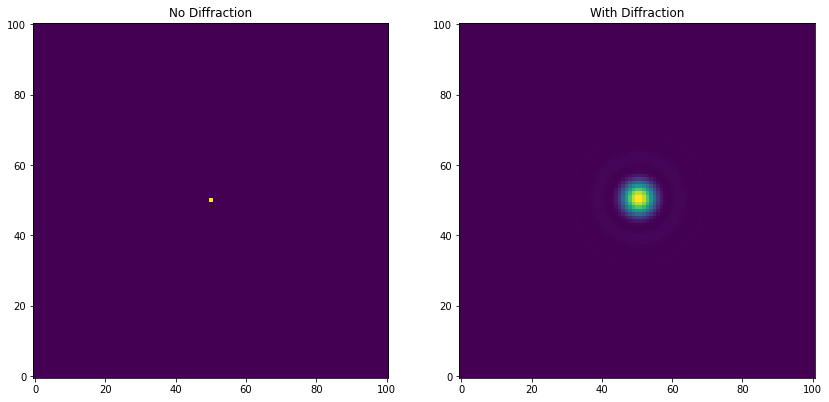

In [10]:
# Now assuming the pixels are the same in the image and the PSF:
from scipy.signal import convolve2d

NPX = 101
NPY = 101
image = np.zeros([NPX,NPY])
image[50,50] = 1.0


psf = pattern
convolved_image = convolve2d(image,psf/np.sum(psf),mode='same',boundary='wrap')
plt.figure(figsize=[14,7])
plt.subplot(121)
plt.imshow(image,origin='lower')
plt.title("No Diffraction")
plt.subplot(122)
plt.imshow(convolved_image,origin='lower')
plt.title("With Diffraction")



Text(0.5, 1.0, 'With Diffraction')

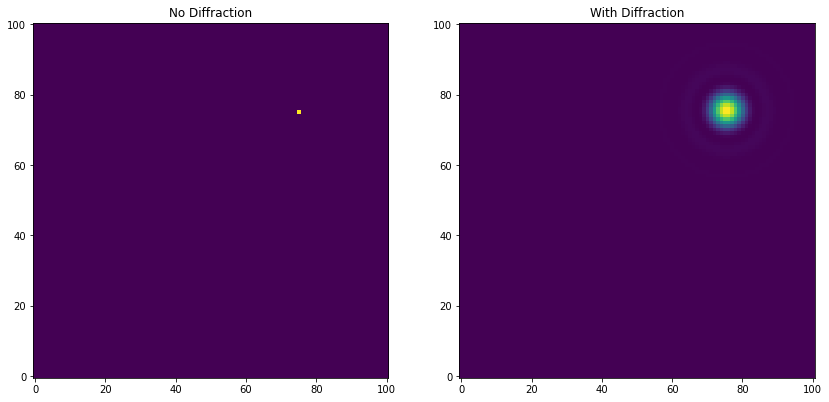

In [11]:
NPX = 101
NPY = 101
image = np.zeros([NPX,NPY])
image[75,75] = 1.0


psf = pattern
convolved_image = convolve2d(image,psf/np.sum(psf),mode='same',boundary='wrap')
plt.figure(figsize=[14,7])
plt.subplot(121)
plt.imshow(image,origin='lower')
plt.title("No Diffraction")
plt.subplot(122)
plt.imshow(convolved_image,origin='lower')
plt.title("With Diffraction")


(311, 236)

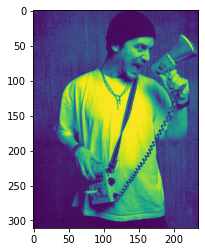

In [12]:
from PIL import Image
im = Image.open("patton.jpg")
im = im.convert('L')

arr = np.fromiter(iter(im.getdata()), np.uint8)
arr.resize(im.height, im.width)

#arr ^= 0xFF  # invert
inverted_im = Image.fromarray(arr, mode='L')
plt.figure()
plt.imshow(arr)
arr.shape

In [11]:
NX = im.height
NY = im.width
print (NX,NY)

311 236


Text(0.5, 1.0, 'With Diffraction')

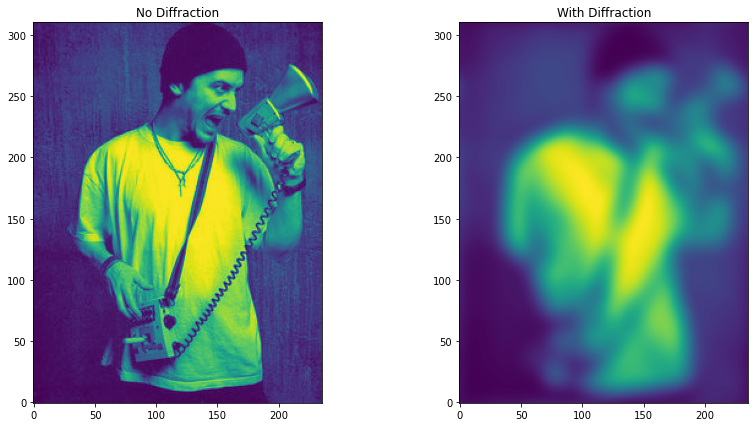

In [22]:
image = arr
psf = pattern
convolved_image = convolve2d(image,psf/np.sum(psf),mode='same',boundary='wrap')
plt.figure(figsize=[14,7])
plt.subplot(121)
plt.imshow(image[::-1,:],origin='lower')
plt.title("No Diffraction")
plt.subplot(122)
plt.imshow(convolved_image[::-1,:],origin='lower')
plt.title("With Diffraction")

### To discuss: 

- What is the difference between image that is blurred in this way, and an unfocused image? 

- What does it mean pixels are the same? 

- What would happen if I had different (i.e. non spherical aperture)